* bin vector lengths
* look at varability of vector direction
  * calculate an angle for each vector (?)
  * look at surrounding vectors and compare 

* for each vector
  * calculate an angle ()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('UWRL_river_velocimetry_dataset.csv')

In [3]:
# df['v_pos'] =  [0 if pd.isna(x) else (-1 if x < 0 else 1) for x in df['v_x']]
df['angle'] = np.arctan2(df['v_y'], df['v_x'])
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location_3',
       'spacial_location_5', 'LRO_discharge', 'LRO_discharge_site',
       'turbidity', 'vegetation', 'visibility', 'cloudcover', 'solarradiation',
       'uvindex', 'conditions', 'angle'],
      dtype='object')


,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,5.95,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1.452306
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",2.175855
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-0.484053
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,3.20,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-2.431922


In [4]:
# sns.scatterplot(
#     data=df,
#     x='v_x',
#     y='angle',
# )
# plt.show()

# sns.scatterplot(
#     data=df,
#     x='v_y',
#     y='angle',
# )
# plt.show()


In [5]:
df['angle_var'] = [np.nan for _ in range(len(df))]
df

,datetime,y,x,v_x,v_y,v_len,s2n,corr,sun_altitude,sun_azimuth,...,LRO_discharge_site,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,angle_var
0,2024-04-10 13:38:23,9.645,0.155,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
1,2024-04-10 13:38:23,9.645,0.285,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
2,2024-04-10 13:38:23,9.645,0.415,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
3,2024-04-10 13:38:23,9.645,0.545,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
4,2024-04-10 13:38:23,9.645,0.675,NaN,NaN,NaN,0.00000,0.00000,0.928858,3.662460,...,MainStreet,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9299131,2024-01-05 13:41:17,0.155,19.525,0.001230,0.010328,0.010401,3.14992,0.48536,0.414650,3.444309,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",1.452306,NaN
9299132,2024-01-05 13:41:17,0.155,19.655,-0.006016,0.008699,0.010577,3.29048,0.50888,0.414650,3.444309,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",2.175855,NaN
9299133,2024-01-05 13:41:17,0.155,19.785,0.007823,-0.004113,0.008838,3.18176,0.50664,0.414650,3.444309,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-0.484053,NaN
9299134,2024-01-05 13:41:17,0.155,19.915,-0.057642,-0.049512,0.075987,3.10912,0.49288,0.414650,3.444309,...,MainStreet,9.71,none,1.2,100.0,133,1,"Snow, Rain, Overcast",-2.431922,NaN


In [35]:
dates = df.datetime.unique()

# for dt in dates:
for i in range(10):
    dt = dates[i]

    print(dt)
    df_dt = df[df.datetime == dt]

    for x in sorted(df_dt.x.unique()):
        xr = round(x, 3)

        for y in sorted(df_dt.y.unique()):
            yr = round(y, 3)

            if (xr in df_dt.x.unique()) and (yr in df_dt[df_dt.x == xr].y.unique()) and not np.isnan(df_dt[(df_dt.x == xr)&(df_dt.y == yr)].angle.min()):

                angles = []
                for x_i in [-0.13, 0, 0.13]:
                    for y_i in [-0.13, 0, 0.13]:
                        if (xr + x_i in df_dt.x.unique()) and (yr + y_i in df_dt.y.unique()) and not np.isnan(df_dt[(df_dt.x == xr + x_i)&(df_dt.y == yr + y_i)].angle.min()):
                            if x_i == 0 and y_i == 0:
                                continue
                            angle_var = ((df_dt[(df_dt.x == xr + x_i)&(df_dt.y == yr + y_i)].angle.unique()[0] - df_dt[(df_dt.x == xr)&(df_dt.y == yr)].angle.unique()[0]) % np.pi)**2
                            angles.append(angle_var)

                if angles != []:
                    df.loc[(df['datetime'] == dt) & (df['x'] == xr) & (df['y'] == yr), 'angle_var'] = sum(angles) / len(angles)




2024-01-02 11:21:43
2024-05-21 06:25:39
2024-02-06 17:39:44
2024-01-03 17:33:04
2024-01-07 13:29:53
2024-05-18 17:55:14
2024-01-06 08:24:19
2024-04-16 13:15:32
2024-05-19 05:10:50
2024-04-13 16:00:44


In [36]:
df2 = df[~(df.angle_var.isna())]

<Axes: xlabel='angle_var', ylabel='v_len'>

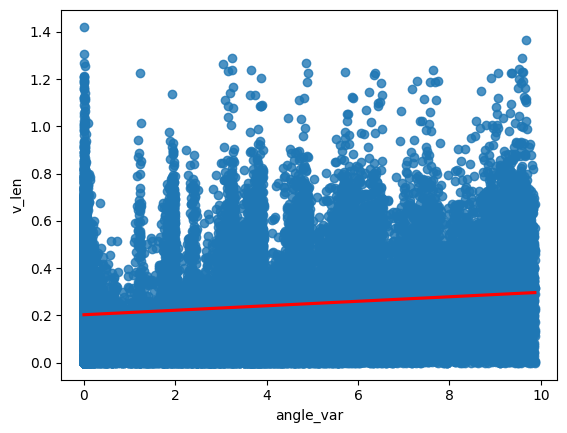

In [47]:
sns.regplot(
    data=df2,
    x='angle_var',
    y='v_len',
    line_kws={'color': 'red'}
)

<Axes: xlabel='v_len', ylabel='angle_var'>

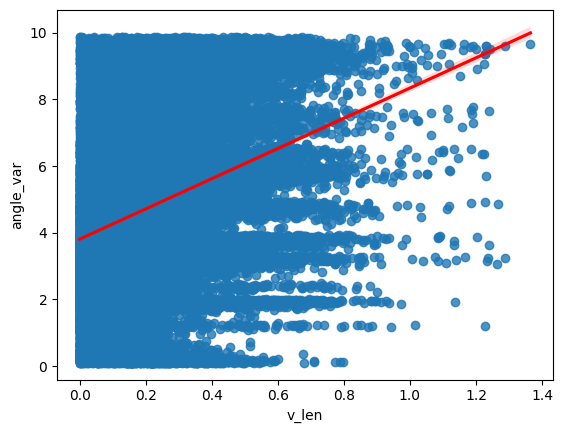

In [46]:
sns.regplot(
    data=df2[df2.angle_var > .1],
    x='v_len',
    y='angle_var',
    line_kws={'color': 'red'}
)

<Axes: xlabel='angle_var', ylabel='Count'>

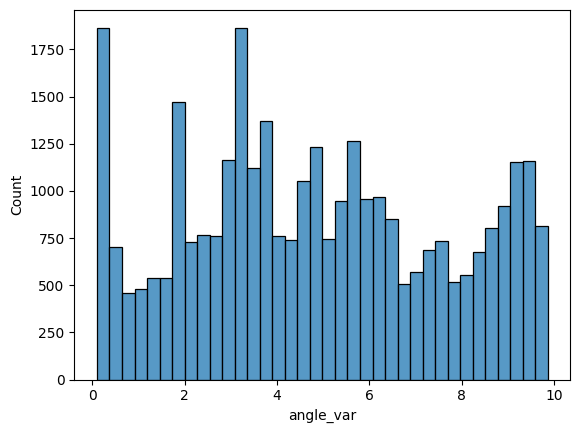

In [45]:
sns.histplot(
    data=df2[df2.angle_var > .1],
    x='angle_var'
)

<Axes: xlabel='conditions', ylabel='angle_var'>

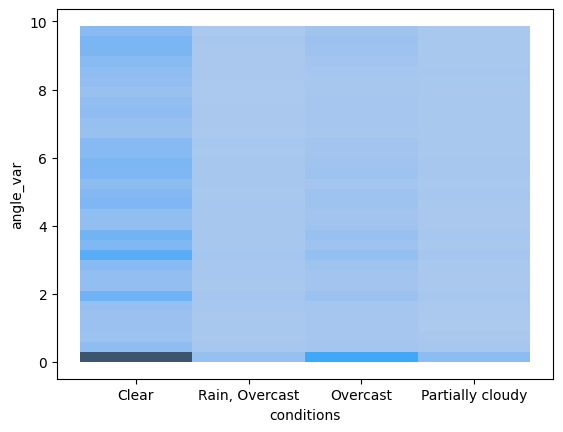

In [53]:
sns.histplot(
    data=df2,
    x='conditions',
    y='angle_var',
)